In [1]:
import gym
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

env = gym.make("Taxi-v3").env

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning

Action Space Discrete(6)
State Space Discrete(500)


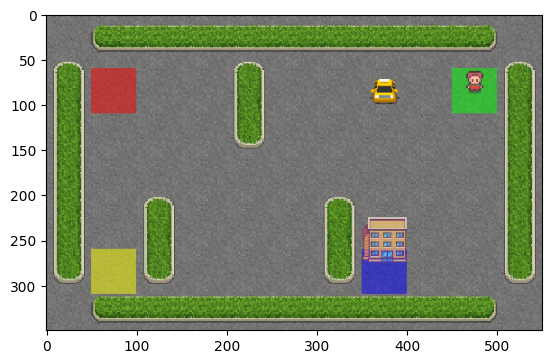

In [2]:
env.reset() # reset environment to a new, random state
plt.imshow(env.render(mode='rgb_array'))
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

In [3]:
!pip install numpy==1.23.5
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [4]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action)

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 1min 17s, sys: 10.1 s, total: 1min 27s
Wall time: 1min 24s


In [5]:
q_table

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -2.41837062,  -2.36395107,  -2.41837065,  -2.3639511 ,
         -2.27325184, -11.36395049],
       [ -1.8701439 ,  -1.45024   ,  -1.87014397,  -1.45024   ,
         -0.7504    , -10.45023501],
       ...,
       [ -1.05362611,   0.4159998 ,  -1.02411283,  -1.18675013,
         -5.15435711,  -3.44020571],
       [ -2.12929404,  -2.12201771,  -2.13238314,  -2.12201461,
         -7.91407445,  -6.75802383],
       [  2.17751915,   1.21021117,   2.82776225,  11.        ,
         -2.36725907,  -2.58789539]])

In [6]:
def record_video(env, q_table, out_directory, fps=1):
    images = []
    done = False
    state = env.reset()
    img = env.render(mode='rgb_array')
    images.append(img)
    while not done:
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(q_table[state][:])
        state, reward, done, info = env.step(action) # We directly put next_state = state for recording logic
        img = env.render(mode='rgb_array')
        images.append(img)
    imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

In [7]:
video_path="./replay.gif"
video_fps=1

In [8]:
import imageio
record_video(env, q_table, video_path, video_fps)

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.11/dist-packages/imageio/plugins/pillow.py:409: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(


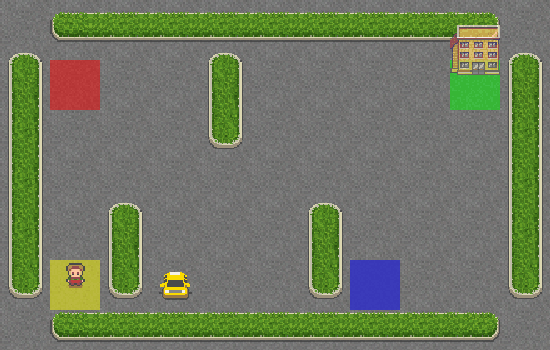

In [9]:
from IPython.display import Image
Image('./replay.gif')